

> **PERSIAPAN DATASET**



dataset yang digunakan adalah dataset penjualan samsung mobile.

https://www.kaggle.com/datasets/datatechexplorer/samsung-mobile-sales-dataset

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("Samsung sales.csv", sep=";")
data

,Year,Quarter,Product Model,5G Capability,Units Sold,Revenue ($),Market Share (%),Regional 5G Coverage (%),5G Subscribers (millions),Avg 5G Speed (Mbps),Preference for 5G (%),Region
0,2019,Q1,Galaxy S10,No,26396,4.212.951.048,1.04,57.36,39.55,293.10,55.87,Asia-Pacific
1,2019,Q1,Galaxy Note10,No,25671,7.240.265.603.999.990,2.82,85.8,42.58,67.46,37.26,Latin America
2,2019,Q1,Galaxy S20,No,16573,25608331.51,-0.03,47.02,3.78,77.25,84.66,Middle East & Africa
3,2019,Q1,Galaxy Note20,No,7177,21984415.83,0.8400000000000001,25.7,23.41,105.27,40.03,North America
4,2019,Q1,Galaxy S21,No,45633,16342437.5,2.36,89.13,44.43,206.17,76.88,Latin America
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Q4,Galaxy S22 5G,Yes,36216,29959374.23,3.82,70.59,46.92,177.43,63.86,Latin America
996,2022,Q2,Galaxy S21,No,33806,23.699.378.709.000.000,-0.23,77.31,47.51,129.70,78.41,North America
997,2022,Q1,Galaxy S10,No,23678,23302026.23,0.5800000000000001,45.61,43.79,156.56,72.06,Europe
998,2023,Q4,Galaxy Note10,No,35697,19462564.98,2.49,36.55,36.44,236.39,47.11,North America


**MEMERIKSA MISSING VALUE**

In [150]:
# memeriksa missing value
data.isna().sum()

,0
Year,0
Quarter,0
Product Model,0
5G Capability,0
Units Sold,0
Revenue ($),0
Market Share (%),0
Regional 5G Coverage (%),0
5G Subscribers (millions),0
Avg 5G Speed (Mbps),0


Berdasarkan hasil didatas, tidak ditemukan missing value pada data.

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1000 non-null   int64  
 1   Quarter                    1000 non-null   object 
 2   Product Model              1000 non-null   object 
 3   5G Capability              1000 non-null   object 
 4   Units Sold                 1000 non-null   int64  
 5   Revenue ($)                1000 non-null   object 
 6   Market Share (%)           1000 non-null   object 
 7   Regional 5G Coverage (%)   1000 non-null   object 
 8   5G Subscribers (millions)  1000 non-null   object 
 9   Avg 5G Speed (Mbps)        1000 non-null   float64
 10  Preference for 5G (%)      1000 non-null   object 
 11  Region                     1000 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 93.9+ KB


In [154]:
#menyederhanakan format units sold memakai format label jutaan (M)
data=data.rename(columns={"Units Sold" : "Units Sold (M)"})
data["Units Sold (M)"]=data["Units Sold (M)"].apply(lambda x: f"{x/1e6:.4f}")
data

,Year,Quarter,Product Model,5G Capability,Units Sold (M),Revenue ($),Market Share (%),Regional 5G Coverage (%),5G Subscribers (millions),Avg 5G Speed (Mbps),Preference for 5G (%),Region
0,2019,Q1,Galaxy S10,No,0.0264,4.212.951.048,1.04,57.36,39.55,293.10,55.87,Asia-Pacific
1,2019,Q1,Galaxy Note10,No,0.0257,7.240.265.603.999.990,2.82,85.8,42.58,67.46,37.26,Latin America
2,2019,Q1,Galaxy S20,No,0.0166,25608331.51,-0.03,47.02,3.78,77.25,84.66,Middle East & Africa
3,2019,Q1,Galaxy Note20,No,0.0072,21984415.83,0.8400000000000001,25.7,23.41,105.27,40.03,North America
4,2019,Q1,Galaxy S21,No,0.0456,16342437.5,2.36,89.13,44.43,206.17,76.88,Latin America
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Q4,Galaxy S22 5G,Yes,0.0362,29959374.23,3.82,70.59,46.92,177.43,63.86,Latin America
996,2022,Q2,Galaxy S21,No,0.0338,23.699.378.709.000.000,-0.23,77.31,47.51,129.70,78.41,North America
997,2022,Q1,Galaxy S10,No,0.0237,23302026.23,0.5800000000000001,45.61,43.79,156.56,72.06,Europe
998,2023,Q4,Galaxy Note10,No,0.0357,19462564.98,2.49,36.55,36.44,236.39,47.11,North America


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1000 non-null   int64  
 1   Quarter                    1000 non-null   object 
 2   Product Model              1000 non-null   object 
 3   5G Capability              1000 non-null   object 
 4   Units Sold (M)             1000 non-null   object 
 5   Revenue ($)                1000 non-null   object 
 6   Market Share (%)           1000 non-null   object 
 7   Regional 5G Coverage (%)   1000 non-null   object 
 8   5G Subscribers (millions)  1000 non-null   object 
 9   Avg 5G Speed (Mbps)        1000 non-null   float64
 10  Preference for 5G (%)      1000 non-null   object 
 11  Region                     1000 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 93.9+ KB


karena data units sold dalam bentuk string maka perlu diubah type menjadi float

In [156]:
data["Units Sold (M)"] = data["Units Sold (M)"].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1000 non-null   int64  
 1   Quarter                    1000 non-null   object 
 2   Product Model              1000 non-null   object 
 3   5G Capability              1000 non-null   object 
 4   Units Sold (M)             1000 non-null   float64
 5   Revenue ($)                1000 non-null   object 
 6   Market Share (%)           1000 non-null   object 
 7   Regional 5G Coverage (%)   1000 non-null   object 
 8   5G Subscribers (millions)  1000 non-null   object 
 9   Avg 5G Speed (Mbps)        1000 non-null   float64
 10  Preference for 5G (%)      1000 non-null   object 
 11  Region                     1000 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


> **VISUALISASI DATA DENGAN BAR PLOT**

In [157]:
data_grouped = data.groupby("Product Model")[["Units Sold (M)"]].sum().reset_index()
data_grouped

,Product Model,Units Sold (M)
0,Galaxy A14 5G,2.2748
1,Galaxy A32 5G,2.4443
2,Galaxy A52 5G,2.5498
3,Galaxy A73 5G,2.5067
4,Galaxy Note10,1.8288
5,Galaxy Note20,1.6871
6,Galaxy S10,1.9374
7,Galaxy S20,1.6637
8,Galaxy S21,1.8611
9,Galaxy S22 5G,2.4611


**VISUALISASI BARPLOT SEDERHANA**




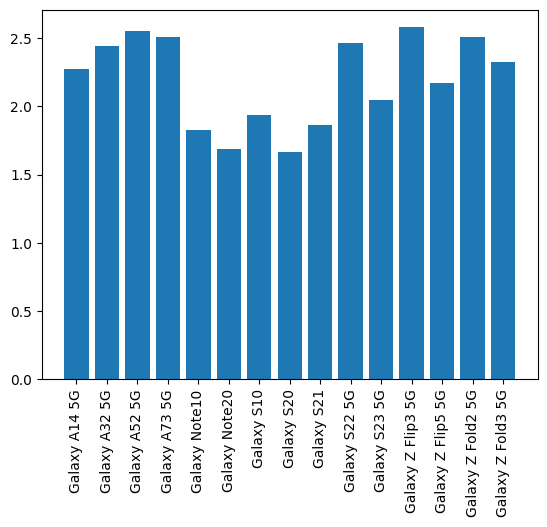

In [98]:
# visualisasi Bar Plot Sederhana
plt.bar(data_grouped["Product Model"],data_grouped["Units Sold (M)"])
plt.xticks(rotation=90)
plt.show()

**VISUALISASI BAR PLOT DENGAN ELEMEN TAMBAHAN**

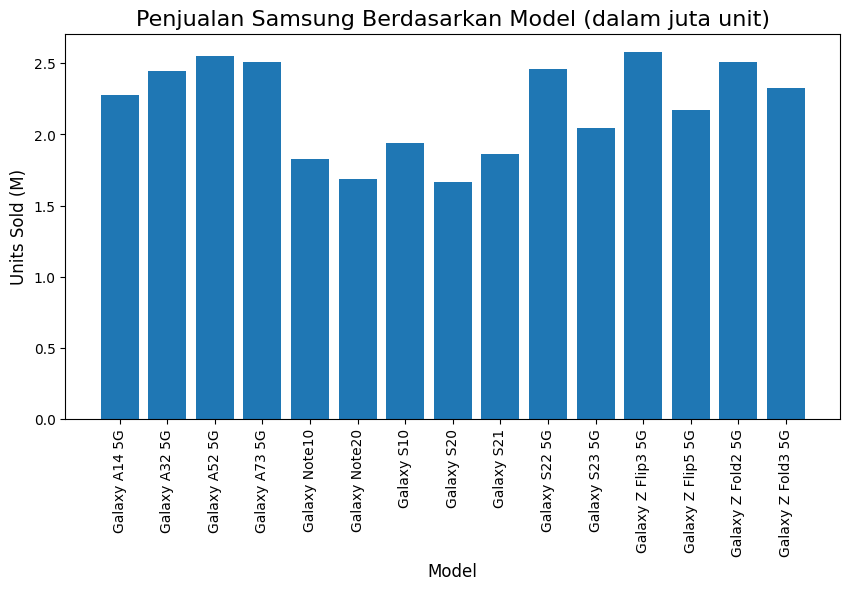

In [158]:
# visualisasi bar plot dengan elemen tambahan

# menentukan dimensi
plt.figure(figsize=(10,5))

# plot data
plt.bar(data_grouped["Product Model"],data_grouped["Units Sold (M)"])
plt.xticks(size=10, rotation=90)
plt.yticks(size=10)
plt.xlabel("Model", size=12)
plt.ylabel("Units Sold (M)", size=12)
plt.title("Penjualan Samsung Berdasarkan Model (dalam juta unit)", size=16)

#menampilkan data
plt.show()


**MENGATUR WARNA BAR**

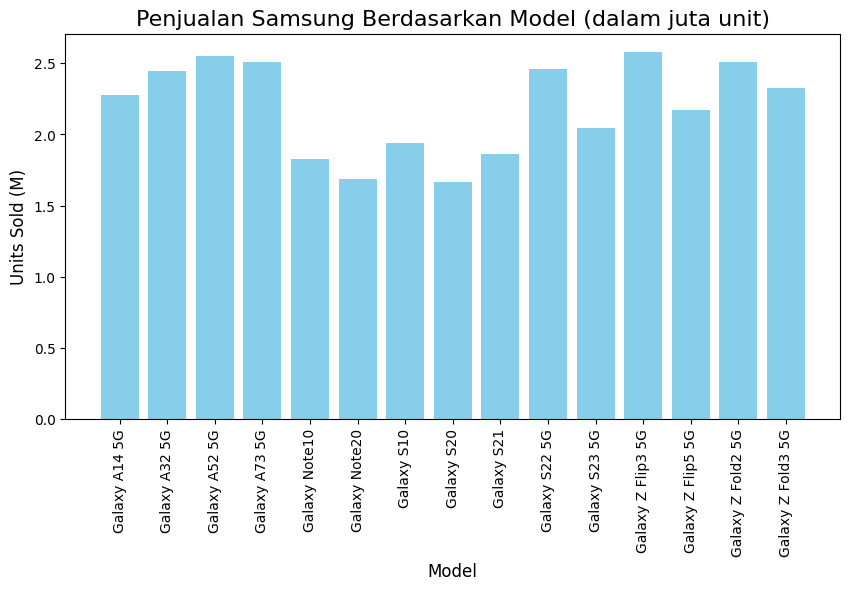

In [159]:
# menentukan dimensi
plt.figure(figsize=(10,5))

# plot data
plt.bar(data_grouped["Product Model"],data_grouped["Units Sold (M)"], color="skyblue")
plt.xticks(size=10, rotation=90)
plt.yticks(size=10)
plt.xlabel("Model", size=12)
plt.ylabel("Units Sold (M)", size=12)
plt.title("Penjualan Samsung Berdasarkan Model (dalam juta unit)", size=16)

#menampilkan data
plt.show()

**MENGATUR WIDTH**

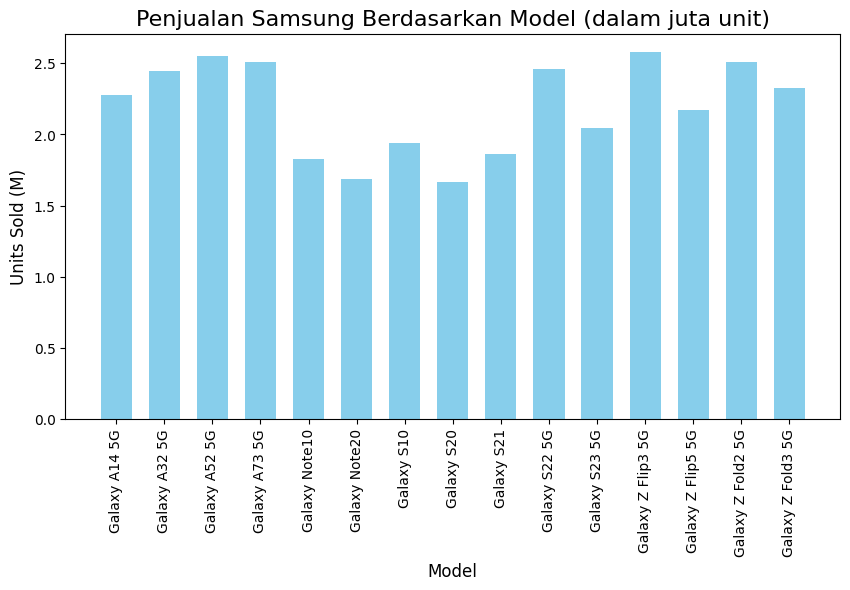

In [160]:
# menentukan dimensi
plt.figure(figsize=(10,5))

# plot data
plt.bar(data_grouped["Product Model"],data_grouped["Units Sold (M)"], color="skyblue", width=0.65)
plt.xticks(size=10, rotation=90)
plt.yticks(size=10)
plt.xlabel("Model", size=12)
plt.ylabel("Units Sold (M)", size=12)
plt.title("Penjualan Samsung Berdasarkan Model (dalam juta unit)", size=16)

#menampilkan data
plt.show()

**MENAMBAHKAN LABEL PADA BAR**

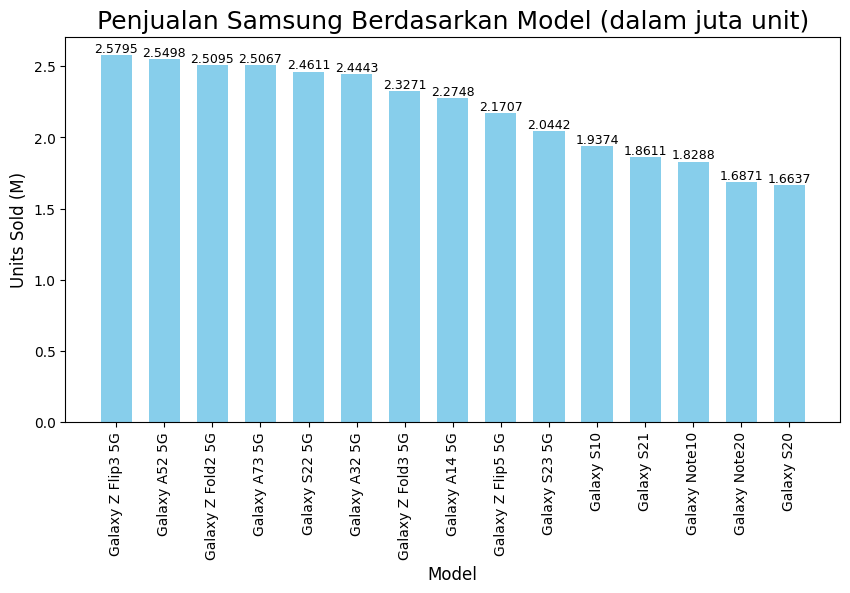

In [161]:
# menentukan dimensi
plt.figure(figsize=(10,5))

data_grouped = data_grouped.sort_values("Units Sold (M)", ascending=False) #agar data urut dari yg terbesar
# plot data
bar_plot=plt.bar(data_grouped["Product Model"],data_grouped["Units Sold (M)"], color="skyblue", width=0.65)
plt.bar_label(bar_plot, fontsize=9, color="black")
plt.xticks(size=10, rotation=90)
plt.yticks(size=10)
plt.xlabel("Model", size=12)
plt.ylabel("Units Sold (M)", size=12)
plt.title("Penjualan Samsung Berdasarkan Model (dalam juta unit)", size=18,)

#menampilkan data
plt.show()



> **HORIZONTAL BAR PLOT**



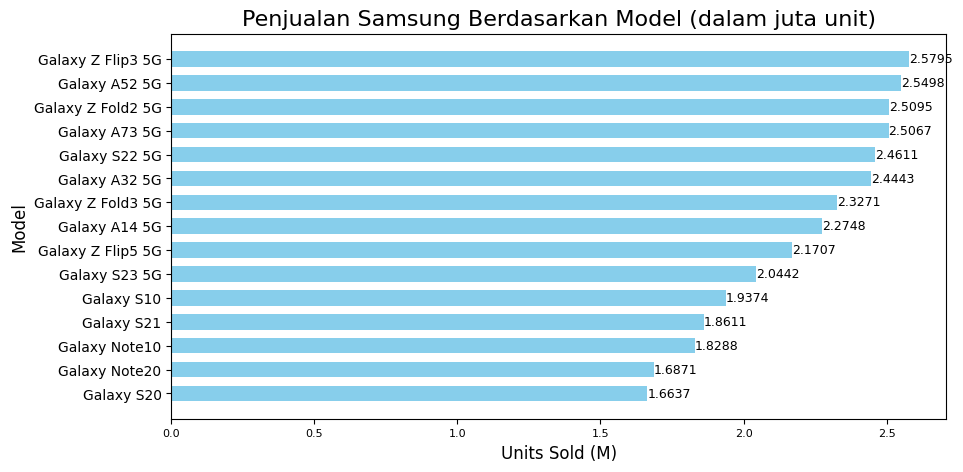

In [162]:
plt.figure(figsize=(10,5))

# urutan dari besar ke kecil
data_total = data_grouped.sort_values("Units Sold (M)", ascending=False)

# plot data
bar_plot=plt.barh(data_grouped["Product Model"],data_grouped["Units Sold (M)"], color="skyblue", height=0.65)
plt.bar_label(bar_plot, fontsize=9, color="black")
plt.xticks(size=8)
plt.yticks(size=10)
plt.xlabel("Units Sold (M)", size=12)
plt.ylabel("Model", size=12)
plt.title("Penjualan Samsung Berdasarkan Model (dalam juta unit)", size=16)
plt.gca().invert_yaxis() #agar nilai besar di atas
#menampilkan data
plt.show()



> **GROUPED BAR PLOT**


Untuk penggunaan grouped barplot menggunakan sample data penjualan samsung tahun 2023 dan 2024

In [163]:
#filter data penjualan tahun 2023 dan 2024

data_sample = data[data["Year"].isin([2023, 2024])]
data_sample

,Year,Quarter,Product Model,5G Capability,Units Sold (M),Revenue ($),Market Share (%),Regional 5G Coverage (%),5G Subscribers (millions),Avg 5G Speed (Mbps),Preference for 5G (%),Region
240,2023,Q1,Galaxy S10,No,0.0409,29431350.05,2.29,31.64,20.82,272.01,80.79,Europe
241,2023,Q1,Galaxy Note10,No,0.0147,15195950.99,1.66,62.66,14.700.000.000.000.000,171.98,74.11,North America
242,2023,Q1,Galaxy S20,No,0.0438,24176526.14,2.45,48.62,20.28,175.27,73.89,Europe
243,2023,Q1,Galaxy Note20,No,0.0415,13687954.88,-0.11,6.218.000.000.000.000,11.77,287.50,41.54,Latin America
244,2023,Q1,Galaxy S21,No,0.0329,22481075.41,1.86,81.72,33.4,108.49,65.46,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
987,2023,Q1,Galaxy A14 5G,Yes,0.0399,30964782.02,5.529.999.999.999.990,47.84,15.23,260.80,82.88,Middle East & Africa
988,2024,Q3,Galaxy A32 5G,Yes,0.0280,70164647.83,2.62,46.76,43.61,103.25,63.21,Middle East & Africa
991,2023,Q1,Galaxy Z Flip5 5G,Yes,0.0117,14130688.68,48.100.000.000.000.000,64.15,50.51,117.92,62.56,Europe
995,2023,Q4,Galaxy S22 5G,Yes,0.0362,29959374.23,3.82,70.59,46.92,177.43,63.86,Latin America


In [168]:
model=data_sample.groupby(["Product Model","Year", "Units Sold (M)"]).size()
data_model=pd.DataFrame(model).reset_index()
data_model

,Product Model,Year,Units Sold (M),0
0,Galaxy A14 5G,2023,0.0379,2
1,Galaxy A14 5G,2023,0.0399,3
2,Galaxy A14 5G,2023,0.0505,2
3,Galaxy A14 5G,2023,0.0514,3
4,Galaxy A14 5G,2024,0.0075,3
...,...,...,...,...
115,Galaxy Z Fold3 5G,2023,0.0585,2
116,Galaxy Z Fold3 5G,2024,0.0066,4
117,Galaxy Z Fold3 5G,2024,0.0313,2
118,Galaxy Z Fold3 5G,2024,0.0332,3


In [169]:
# filter dataframe product model dengan year

data_filter = (
    data_model
    .groupby(["Product Model", "Year"])[["Units Sold (M)"]]
    .sum()
    .reset_index()
    .sort_values(by=["Product Model", "Year"])
)

data_filter


,Product Model,Year,Units Sold (M)
0,Galaxy A14 5G,2023,0.1797
1,Galaxy A14 5G,2024,0.0864
2,Galaxy A32 5G,2023,0.1061
3,Galaxy A32 5G,2024,0.1730
4,Galaxy A52 5G,2023,0.1626
5,Galaxy A52 5G,2024,0.1127
6,Galaxy A73 5G,2023,0.1613
7,Galaxy A73 5G,2024,0.1292
8,Galaxy Note10,2023,0.0773
9,Galaxy Note10,2024,0.1244


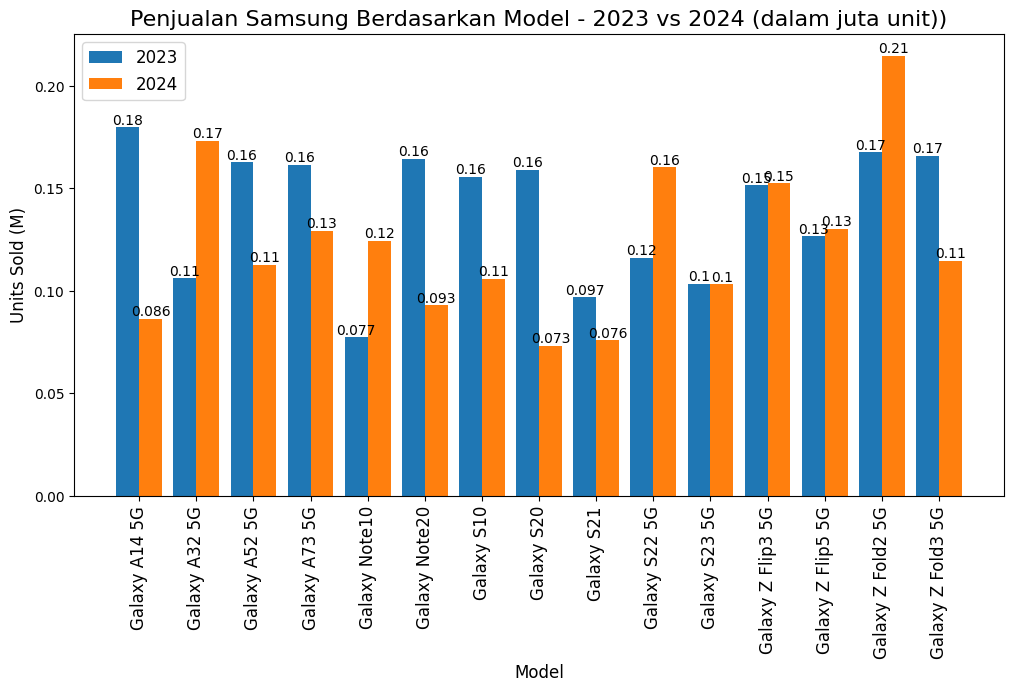

In [170]:
import matplotlib.pyplot as plt
import numpy as np

pivot_data = data_filter.pivot(index="Product Model", columns="Year", values="Units Sold (M)").fillna(0)


plt.figure(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(pivot_data.index))

bar1 = plt.bar(x, pivot_data[2023], bar_width, label="2023")
bar2 = plt.bar(x + bar_width, pivot_data[2024], bar_width, label="2024")

plt.xlabel("Model", size=12)
plt.ylabel("Units Sold (M)", size=12)
plt.title("Penjualan Samsung Berdasarkan Model - 2023 vs 2024 (dalam juta unit))", size=16)
plt.xticks(x + bar_width/2, pivot_data.index, rotation=90, size=12)
plt.yticks(size=10)
plt.legend(fontsize=12)


for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.2}",
        ha="center", va="bottom", size=10
    )

plt.show()



> **STACKED BAR PLOT**



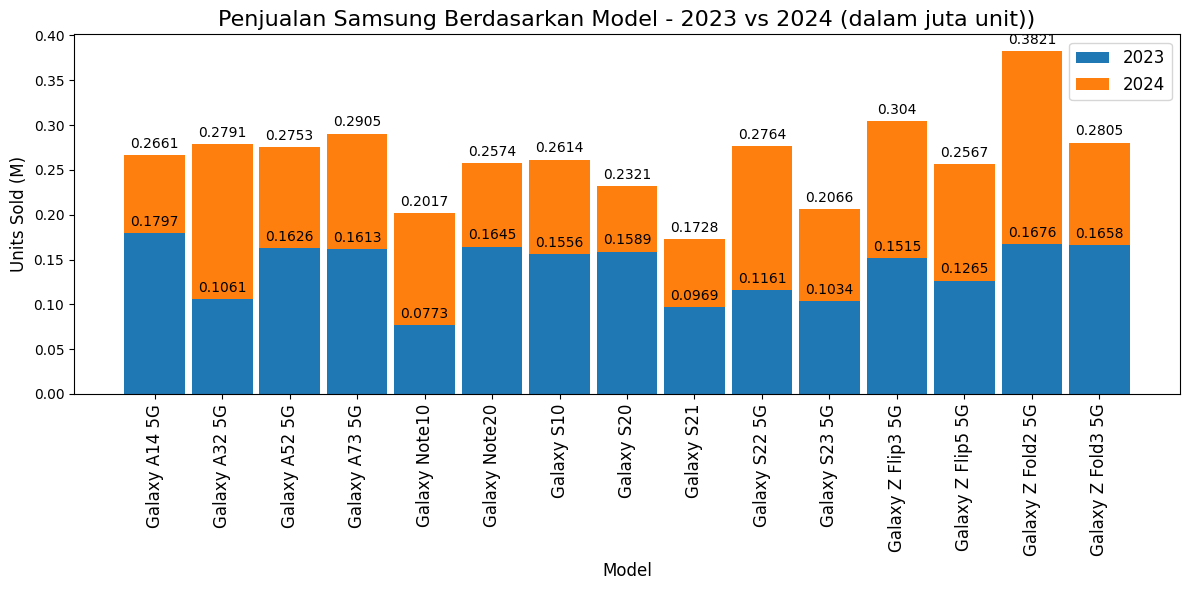

In [171]:
# menentukan dimensi
plt.figure(figsize=(12, 6))

bar_width = 0.9
x = np.arange(len(pivot_data.index))

# plot data untuk 2023 dan 2024
bar1 = plt.bar(x, pivot_data[2023], bar_width, label='2023')
bar2 = plt.bar(x, pivot_data[2024], bar_width, label='2024', bottom=pivot_data[2023])

# menampilkan label dan judul
plt.xlabel("Model", size=12)
plt.ylabel("Units Sold (M)", size=12)
plt.title("Penjualan Samsung Berdasarkan Model - 2023 vs 2024 (dalam juta unit))", size=16)
plt.xticks(x, pivot_data.index, rotation=90, size=12)
plt.yticks(size=10)

# menampilkan label angka
plt.bar_label(bar1, padding=3)
plt.bar_label(bar2, padding=3)

# Amemunculkan legend
plt.legend(fontsize=12)

#menampilkan data
plt.tight_layout()
plt.show()